## Slide Presentation

In [1]:
import pandas as pd

### 📊 Initial Shape of our Data set

In [2]:
file_path = '/Users/miguelaraujo/code/MrAraujo99/ET_Predictor/raw_data/UFO sightings/scrubbed.csv'
data = pd.read_csv(file_path, low_memory=False)

data.shape

(80332, 11)

### 👉 Missing data that we had to deal with(index 2,3,4,7)

In [3]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


####  👉 How we dealt with the missing data(Explain)
should we impute unkown cities or leave it?

In [4]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Convert latitude and longitude to numeric, forcing invalid parsing to NaN
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# Convert duration (seconds) to numeric, forcing invalid parsing to NaN
data['duration (seconds)'] = pd.to_numeric(data['duration (seconds)'], errors='coerce')

# Convert datetime column to datetime object
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# Drop rows with NaN values in datetime, duration (seconds), latitude, or longitude
data.dropna(subset=['datetime', 'duration (seconds)', 'latitude', 'longitude'], inplace=True)

# Handle missing values in state, country, and shape
# For simplicity, fill missing values with 'Unknown'
data['state'] = data['state'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['shape'] = data['shape'].fillna('Unknown')

# Display the cleaned dataset's info and first few rows to verify
cleaned_data_info = data.info()
cleaned_data_head = data.head()

cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
Index: 79634 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              79634 non-null  datetime64[ns]
 1   city                  79634 non-null  object        
 2   state                 79634 non-null  object        
 3   country               79634 non-null  object        
 4   shape                 79634 non-null  object        
 5   duration (seconds)    79634 non-null  float64       
 6   duration (hours/min)  79634 non-null  object        
 7   comments              79619 non-null  object        
 8   date posted           79634 non-null  object        
 9   latitude              79634 non-null  float64       
 10  longitude             79634 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 7.3+ MB


### 👉  Nan values for each feature updated

In [5]:
# Assuming 'data' is your DataFrame
# Display the sum of NaN values for each feature
nan_sum = data.isna().sum()

# Display the results
print("Sum of NaN values for each feature:\n", nan_sum)


Sum of NaN values for each feature:
 datetime                 0
city                     0
state                    0
country                  0
shape                    0
duration (seconds)       0
duration (hours/min)     0
comments                15
date posted              0
latitude                 0
longitude                0
dtype: int64


### Is this relevant??

In [6]:
numerical_summary = data[['duration (seconds)', 'latitude', 'longitude']].describe()
print("Numerical Summary Statistics:")
print(numerical_summary)

Numerical Summary Statistics:
       duration (seconds)      latitude     longitude
count        7.963400e+04  79634.000000  79634.000000
mean         8.078740e+03     38.125819    -86.844174
std          5.930974e+05     10.444614     39.577622
min          1.000000e-03    -82.862752   -173.985008
25%          3.000000e+01     34.136389   -112.073333
50%          1.800000e+02     39.414167    -87.903611
75%          6.000000e+02     42.787361    -78.781389
max          9.783600e+07     72.700000    178.441900


### The entire Shape Distribution of the past ufo's sightings

In [29]:
# Get the total number of cities in the dataset where a sighting occurred
city_distribution = data['city'].value_counts()
print("\nWhole City Distribution Across the World Map:")
print(f"Total Number of Cities: {city_distribution.shape[0]}")

# Filter the data for US and Canada
us_ca_data = data[(data['country'] == 'us') | (data['country'] == 'ca')]

# Calculate the city distribution for US and Canada
city_distribution_us_ca = us_ca_data['city'].value_counts()
print("\nCity Distribution in US and Canada:")
print(f"Total Number of Cities: {city_distribution_us_ca.shape[0]}")



Whole City Distribution Across the World Map:
Total Number of Cities: 19726

City Distribution in US and Canada:
Total Number of Cities: 11970


#### 👉  the total number of states in the dataset where a sighting occurred(relevant?)

In [9]:
state_distribution = data['state'].value_counts()
state_distribution.shape


(68,)

#### 👉 Reason why we chose the data only for  US AND Canada

In [33]:
country_distribution = data['country'].value_counts()

# Total sightings
total_sightings = country_distribution.sum()

# Sightings in the US and Canada
us_sightings = country_distribution['us']
ca_sightings = country_distribution['ca']

# Percentage calculations
us_percentage = (us_sightings / total_sightings) * 100
ca_percentage = (ca_sightings / total_sightings) * 100

# Print the results in a more readable format
print("Country Distribution of UFO Sightings:\n")
print(country_distribution)
print("\nPercentage of Sightings:")
print(f"  - US: {us_percentage:.2f}%")
print(f"  - Canada: {ca_percentage:.2f}%")


Country Distribution of UFO Sightings:

country
us         64625
Unknown     9531
ca          2979
gb          1865
au           532
de           102
Name: count, dtype: int64

Percentage of Sightings:
  - US: 81.15%
  - Canada: 3.74%


## 🎖️ TOP 10 city, shape, and state distribution 

In [12]:
# Displaying the top 10 values for shape, city, state, and country distributions
import pandas as pd

# Given distributions
shape_distribution = pd.DataFrame({
    'Shape': ['light', 'triangle', 'circle', 'fireball', 'other', 'unknown', 'sphere', 'disk', 'oval', 'formation'],
    'Count': [16465, 7813, 7532, 6166, 5591, 5532, 5341, 5138, 3699, 2442]
})

city_distribution = pd.DataFrame({
    'City': ['seattle', 'phoenix', 'portland', 'las vegas', 'los angeles', 'san diego', 'houston', 'chicago', 'tucson', 'miami'],
    'Count': [521, 450, 373, 368, 349, 335, 295, 263, 241, 238]
})

state_distribution = pd.DataFrame({
    'State': ['ca', 'Unknown', 'wa', 'fl', 'tx', 'ny', 'az', 'il', 'pa', 'oh'],
    'Count': [9583, 5685, 4240, 4175, 3638, 3195, 2666, 2627, 2567, 2401]
})


# Displaying the top 10 values for shape, city, state, and country distributions
top_shape_distribution = shape_distribution.head(10)
top_city_distribution = city_distribution.head(10)
top_state_distribution = state_distribution.head(10)
top_country_distribution = country_distribution.head(10)

# Format and print the distributions
print("Top 10 Shape Distribution:\n")
print(top_shape_distribution.to_string(index=False))

print("\nTop 10 City Distribution:\n")
print(top_city_distribution.to_string(index=False))

print("\nTop 10 State Distribution:\n")
print(top_state_distribution.to_string(index=False))

Top 10 Shape Distribution:

    Shape  Count
    light  16465
 triangle   7813
   circle   7532
 fireball   6166
    other   5591
  unknown   5532
   sphere   5341
     disk   5138
     oval   3699
formation   2442

Top 10 City Distribution:

       City  Count
    seattle    521
    phoenix    450
   portland    373
  las vegas    368
los angeles    349
  san diego    335
    houston    295
    chicago    263
     tucson    241
      miami    238

Top 10 State Distribution:

  State  Count
     ca   9583
Unknown   5685
     wa   4240
     fl   4175
     tx   3638
     ny   3195
     az   2666
     il   2627
     pa   2567
     oh   2401


## 📈 Number of sightings over the years
should we try to find correlations why from 1996 there was a exponential increase on the number of sightings?


1-Accessibility to Communication: The rise of the internet and mobile phones has made it easier for people to report and share their experiences.


2- Media Influence: Increased coverage of UFO sightings and related phenomena in movies, television shows, and news outlets may have raised public awareness and interest.


3-Social Media(introduced in 1997): Platforms like Facebook, Twitter, and Reddit have provided new ways for people to quickly share their sightings with a large audience.


4-Digital Cameras and Smartphones: The widespread availability of digital cameras and smartphones has made it easier for individuals to capture and document sightings.


5-Increased Public Interest: Events like the Roswell anniversary and government disclosures about UFO investigations may have sparked public curiosity and reporting.


6-Global Connectivity: Greater global connectivity allows for more rapid dissemination of information, leading to a higher number of reported sightings from diverse locations.


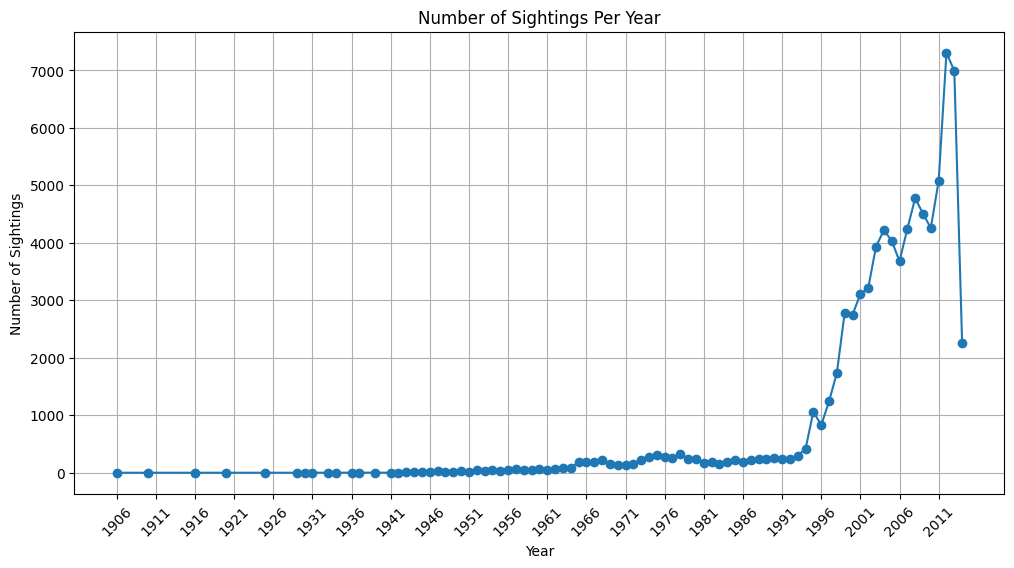

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and already cleaned

# Extract the year from the datetime column
data['year'] = data['datetime'].dt.year

# Count the number of sightings per year
sightings_per_year = data['year'].value_counts().sort_index()

# Plot the number of sightings per year
plt.figure(figsize=(12, 6))
plt.plot(sightings_per_year.index, sightings_per_year.values, marker='o')
plt.title('Number of Sightings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)

# Set x-axis ticks to display every 5 years
years = range(sightings_per_year.index.min(), sightings_per_year.index.max() + 1, 5)
plt.xticks(years, rotation=45)

plt.show()



In [14]:
!pip install geopandas geopy


## 📍 Data visualization of the data points in the world map

/var/folders/0m/p33mzd1n3nq5v3977g7mxf1r0000gn/T/ipykernel_13460/2462800361.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


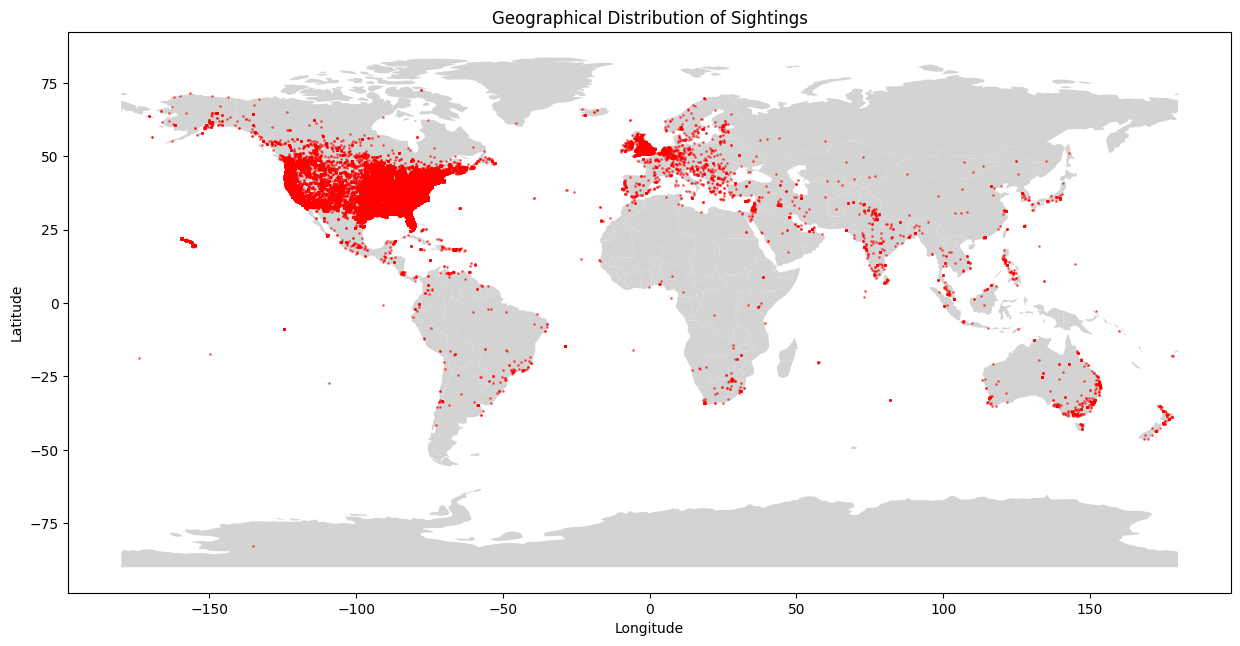

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the sightings on the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot the sightings
geo_data.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.title('Geographical Distribution of Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## 📍 Data visualization in the world map with only US and Canada to compare with the entire Dataset

/var/folders/0m/p33mzd1n3nq5v3977g7mxf1r0000gn/T/ipykernel_13460/742224368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


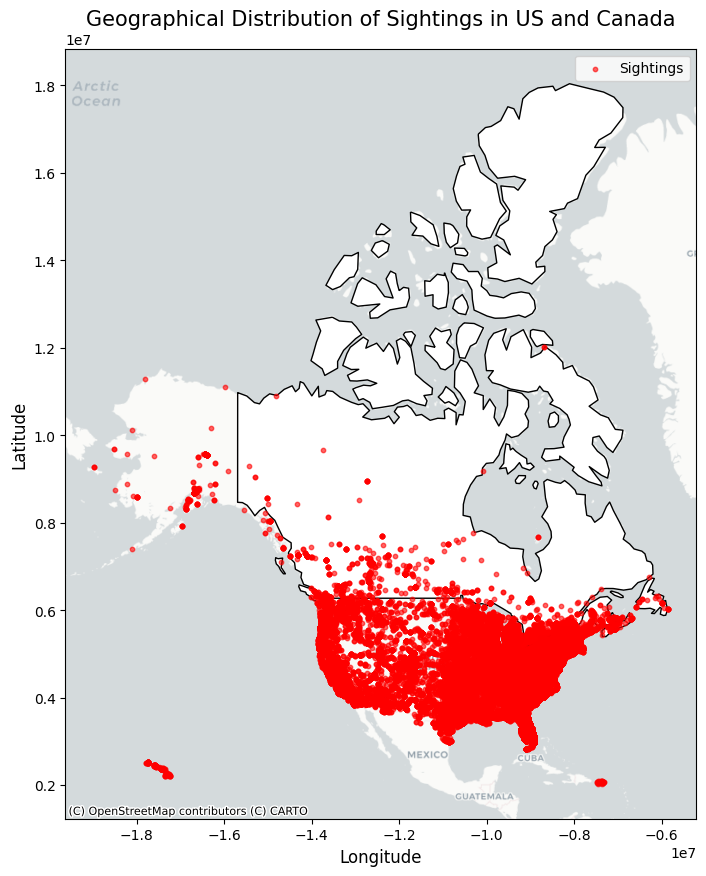

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame for US and Canada
us_ca_geo_data = geo_data[(geo_data['country'] == 'us') | (geo_data['country'] == 'ca')]

# Filter the world map to show only US and Canada
us_ca_world = world[(world['name'] == 'United States') | (world['name'] == 'Canada')]

# Convert the GeoDataFrame to the same CRS as the basemap
us_ca_geo_data = us_ca_geo_data.to_crs(epsg=3857)
us_ca_world = us_ca_world.to_crs(epsg=3857)

# Plot the sightings in US and Canada on the world map
fig, ax = plt.subplots(figsize=(15, 10))
us_ca_world.plot(ax=ax, color='white', edgecolor='black')

# Plot the sightings
us_ca_geo_data.plot(ax=ax, markersize=10, color='red', alpha=0.6, label='Sightings')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add title and labels
plt.title('Geographical Distribution of Sightings in US and Canada', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.show()

